## Bibliotecas ##

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from typing import Optional, Any

## Algoritmo da Árvore Rubro-Negra: ##

In [2]:
from typing import Any, Optional

class NoRBT:
    """Representa um nó na Árvore Rubro-Negra."""
    
    def __init__(self, valor: Any):
        self.valor = valor
        self.cor = "VERMELHO"
        self.pai: Optional['NoRBT'] = None
        self.esquerda: Optional['NoRBT'] = None
        self.direita: Optional['NoRBT'] = None


class ArvoreRubroNegra:
    """Implementa a estrutura principal da Árvore Rubro-Negra."""
    
    def __init__(self, visualizar_passos=False):
        self.NIL = self._cria_no_sentinela()
        self.raiz: Optional[NoRBT] = self.NIL
        self.visualizar_passos = visualizar_passos
        self.passo_atual = 0

    def _cria_no_sentinela(self) -> NoRBT:
        sentinela = NoRBT(None)
        sentinela.cor = "PRETO"
        sentinela.esquerda = sentinela
        sentinela.direita = sentinela
        sentinela.pai = sentinela
        return sentinela

    def inserir(self, valor: Any):
        """Insere um novo valor e aplica o balanceamento da RBT."""
        if self.visualizar_passos:
            self.passo_atual += 1
            print(f"\n{'='*60}")
            print(f"PASSO {self.passo_atual}: Inserindo valor {valor}")
            print(f"{'='*60}")
        
        novo_no = NoRBT(valor)
        novo_no.esquerda = self.NIL 
        novo_no.direita = self.NIL
        self._inserir_bst(novo_no)
        
        if self.visualizar_passos:
            print(f"\n→ Nó {valor} inserido como VERMELHO")
            self.plotar_arvore(f"Passo {self.passo_atual}a: Após inserção de {valor}", 
                             destacar_no=novo_no)

        if novo_no != self.NIL:
            self._balancear_apos_insercao(novo_no)
            self.raiz.cor = "PRETO"
            
            if self.visualizar_passos:
                print(f"\n→ Balanceamento concluído")
                self.plotar_arvore(f"Passo {self.passo_atual}b: Após balanceamento de {valor}")

    def _inserir_bst(self, novo_no: NoRBT):
        """Localiza a posição e insere o novo nó como em uma BST."""
        y = self.NIL
        x = self.raiz
        while x != self.NIL:
            y = x
            if novo_no.valor < x.valor:
                x = x.esquerda
            else:
                x = x.direita
        novo_no.pai = y
        if y == self.NIL:
            self.raiz = novo_no
        elif novo_no.valor < y.valor:
            y.esquerda = novo_no
        else:
            y.direita = novo_no

    def _balancear_apos_insercao(self, no_z: NoRBT):
        """Corrige violações da Propriedade 4 (Vermelho-Vermelho)."""
        while no_z.pai.cor == "VERMELHO":
            if no_z.pai == no_z.pai.pai.esquerda:
                tio = no_z.pai.pai.direita
                if tio.cor == "VERMELHO":
                    if self.visualizar_passos:
                        print(f"  ⚡ Caso 1: Recoloração (tio vermelho)")
                    no_z.pai.cor = "PRETO"
                    tio.cor = "PRETO"
                    no_z.pai.pai.cor = "VERMELHO"
                    no_z = no_z.pai.pai
                else:
                    if no_z == no_z.pai.direita:
                        if self.visualizar_passos:
                            print(f"  ⚡ Caso 2: Nó é filho direito")
                        no_z = no_z.pai
                        self._rotacao_esquerda(no_z)
                    if self.visualizar_passos:
                        print(f"  ⚡ Caso 3: Recoloração e rotação")
                    no_z.pai.cor = "PRETO"
                    no_z.pai.pai.cor = "VERMELHO"
                    self._rotacao_direita(no_z.pai.pai)
            else:
                tio = no_z.pai.pai.esquerda
                if tio.cor == "VERMELHO":
                    if self.visualizar_passos:
                        print(f"  ⚡ Caso 1: Recoloração (tio vermelho)")
                    no_z.pai.cor = "PRETO"
                    tio.cor = "PRETO"
                    no_z.pai.pai.cor = "VERMELHO"
                    no_z = no_z.pai.pai
                else:
                    if no_z == no_z.pai.esquerda:
                        if self.visualizar_passos:
                            print(f"  ⚡ Caso 2: Nó é filho esquerdo")
                        no_z = no_z.pai
                        self._rotacao_direita(no_z)
                    if self.visualizar_passos:
                        print(f"  ⚡ Caso 3: Recoloração e rotação")
                    no_z.pai.cor = "PRETO"
                    no_z.pai.pai.cor = "VERMELHO"
                    self._rotacao_esquerda(no_z.pai.pai)
        self.raiz.cor = "PRETO"

    def excluir(self, valor: Any) -> bool:
        """
        Remove um valor da árvore.
        Retorna True se o valor foi encontrado e removido, False caso contrário.
        """
        no_z = self._buscar_interno(valor)
        
        if no_z == self.NIL:
            if self.visualizar_passos:
                print(f"\n⚠️ Valor {valor} não encontrado na árvore!")
            return False
        
        if self.visualizar_passos:
            self.passo_atual += 1
            print(f"\n{'='*60}")
            print(f"PASSO {self.passo_atual}: Excluindo valor {valor}")
            print(f"{'='*60}")
            self.plotar_arvore(f"Antes da exclusão de {valor}", destacar_no=no_z)
        
        self._excluir_no(no_z)
        
        if self.visualizar_passos:
            print(f"\n→ Exclusão concluída")
            self.plotar_arvore(f"Após exclusão de {valor}")
        
        return True
    
    def _excluir_no(self, no_z: NoRBT):
        """Remove o nó da árvore e corrige as propriedades RBT."""
        no_y = no_z
        cor_original_y = no_y.cor
        
        if no_z.esquerda == self.NIL:
            no_x = no_z.direita
            if self.visualizar_passos:
                print(f"  → Caso: Nó sem filho esquerdo")
            self._transplantar(no_z, no_z.direita)
            
        elif no_z.direita == self.NIL:
            no_x = no_z.esquerda
            if self.visualizar_passos:
                print(f"  → Caso: Nó sem filho direito")
            self._transplantar(no_z, no_z.esquerda)
            
        else:
            no_y = self._minimo(no_z.direita)
            cor_original_y = no_y.cor
            no_x = no_y.direita
            
            if self.visualizar_passos:
                print(f"  → Caso: Nó com dois filhos")
                print(f"  → Sucessor encontrado: {no_y.valor}")
            
            if no_y.pai == no_z:
                no_x.pai = no_y
            else:
                self._transplantar(no_y, no_y.direita)
                no_y.direita = no_z.direita
                no_y.direita.pai = no_y
            
            self._transplantar(no_z, no_y)
            no_y.esquerda = no_z.esquerda
            no_y.esquerda.pai = no_y
            no_y.cor = no_z.cor
        
        if cor_original_y == "PRETO":
            if self.visualizar_passos:
                print(f"  → Nó removido era PRETO, iniciando correção...")
            self._corrigir_exclusao(no_x)
    
    def _transplantar(self, u: NoRBT, v: NoRBT):
        """Substitui a subárvore enraizada em u pela subárvore enraizada em v."""
        if u.pai == self.NIL:
            self.raiz = v
        elif u == u.pai.esquerda:
            u.pai.esquerda = v
        else:
            u.pai.direita = v
        v.pai = u.pai
    
    def _minimo(self, no: NoRBT) -> NoRBT:
        """Retorna o nó com menor valor na subárvore."""
        while no.esquerda != self.NIL:
            no = no.esquerda
        return no
    
    def _maximo(self, no: NoRBT) -> NoRBT:
        """Retorna o nó com maior valor na subárvore."""
        while no.direita != self.NIL:
            no = no.direita
        return no
    
    def _corrigir_exclusao(self, no_x: NoRBT):
        """Corrige as propriedades da RBT após exclusão."""
        while no_x != self.raiz and no_x.cor == "PRETO":
            if no_x == no_x.pai.esquerda:
                irmao = no_x.pai.direita
                
                if irmao.cor == "VERMELHO":
                    if self.visualizar_passos:
                        print(f"    Caso 1: Irmão vermelho")
                    irmao.cor = "PRETO"
                    no_x.pai.cor = "VERMELHO"
                    self._rotacao_esquerda(no_x.pai)
                    irmao = no_x.pai.direita
                
                if irmao.esquerda.cor == "PRETO" and irmao.direita.cor == "PRETO":
                    if self.visualizar_passos:
                        print(f"    Caso 2: Irmão preto, filhos pretos")
                    irmao.cor = "VERMELHO"
                    no_x = no_x.pai
                else:
                    if irmao.direita.cor == "PRETO":
                        if self.visualizar_passos:
                            print(f"    Caso 3: Irmão preto, filho esq vermelho")
                        irmao.esquerda.cor = "PRETO"
                        irmao.cor = "VERMELHO"
                        self._rotacao_direita(irmao)
                        irmao = no_x.pai.direita
                    
                    if self.visualizar_passos:
                        print(f"    Caso 4: Irmão preto, filho dir vermelho")
                    irmao.cor = no_x.pai.cor
                    no_x.pai.cor = "PRETO"
                    irmao.direita.cor = "PRETO"
                    self._rotacao_esquerda(no_x.pai)
                    no_x = self.raiz
            else:
                irmao = no_x.pai.esquerda
                
                if irmao.cor == "VERMELHO":
                    if self.visualizar_passos:
                        print(f"    Caso 1 (sim): Irmão vermelho")
                    irmao.cor = "PRETO"
                    no_x.pai.cor = "VERMELHO"
                    self._rotacao_direita(no_x.pai)
                    irmao = no_x.pai.esquerda
                
                if irmao.direita.cor == "PRETO" and irmao.esquerda.cor == "PRETO":
                    if self.visualizar_passos:
                        print(f"    Caso 2 (sim): Irmão preto, filhos pretos")
                    irmao.cor = "VERMELHO"
                    no_x = no_x.pai
                else:
                    if irmao.esquerda.cor == "PRETO":
                        if self.visualizar_passos:
                            print(f"    Caso 3 (sim): Irmão preto, filho dir vermelho")
                        irmao.direita.cor = "PRETO"
                        irmao.cor = "VERMELHO"
                        self._rotacao_esquerda(irmao)
                        irmao = no_x.pai.esquerda
                    
                    if self.visualizar_passos:
                        print(f"    Caso 4 (sim): Irmão preto, filho esq vermelho")
                    irmao.cor = no_x.pai.cor
                    no_x.pai.cor = "PRETO"
                    irmao.esquerda.cor = "PRETO"
                    self._rotacao_direita(no_x.pai)
                    no_x = self.raiz
        
        no_x.cor = "PRETO"

    def _rotacao_esquerda(self, no_x: NoRBT):
        """Realiza uma rotação à esquerda em torno de no_x."""
        if self.visualizar_passos:
            print(f"  ↻ Rotação à ESQUERDA em {no_x.valor}")
        no_y = no_x.direita 
        no_x.direita = no_y.esquerda
        if no_y.esquerda != self.NIL:
            no_y.esquerda.pai = no_x
        no_y.pai = no_x.pai
        if no_x.pai == self.NIL:
            self.raiz = no_y
        elif no_x == no_x.pai.esquerda:
            no_x.pai.esquerda = no_y
        else:
            no_x.pai.direita = no_y
        no_y.esquerda = no_x
        no_x.pai = no_y

    def _rotacao_direita(self, no_y: NoRBT):
        """Realiza uma rotação à direita em torno de no_y."""
        if self.visualizar_passos:
            print(f"  ↺ Rotação à DIREITA em {no_y.valor}")
        no_x = no_y.esquerda
        no_y.esquerda = no_x.direita
        if no_x.direita != self.NIL:
            no_x.direita.pai = no_y
        no_x.pai = no_y.pai
        if no_y.pai == self.NIL:
            self.raiz = no_x
        elif no_y == no_y.pai.esquerda:
            no_y.pai.esquerda = no_x
        else:
            no_y.pai.direita = no_x
        no_x.direita = no_y
        no_y.pai = no_x

    def _buscar_interno(self, valor: Any) -> Optional[NoRBT]:
        """Busca interna sem visualização (usada pela exclusão)."""
        atual = self.raiz
        while atual != self.NIL and valor != atual.valor:
            if valor < atual.valor:
                atual = atual.esquerda
            else:
                atual = atual.direita
        return atual

    def buscar(self, valor: Any, visualizar=None) -> Optional[NoRBT]:
        """
        Busca um valor na árvore com visualização passo a passo.
        
        Args:
            valor: Valor a ser buscado
            visualizar: Se True, mostra passo a passo. Se None, usa self.visualizar_passos
        
        Returns:
            O nó encontrado ou NIL se não encontrar
        """
        mostrar = visualizar if visualizar is not None else self.visualizar_passos
        
        if mostrar:
            self.passo_atual += 1
            print(f"\n{'='*60}")
            print(f"🔍 BUSCA: Procurando valor {valor}")
            print(f"{'='*60}")
        
        atual = self.raiz
        passo_busca = 0
        caminho = []
        
        while atual != self.NIL and valor != atual.valor:
            caminho.append(atual)
            passo_busca += 1
            
            if mostrar:
                direcao = "ESQUERDA" if valor < atual.valor else "DIREITA"
                print(f"\n  Passo {passo_busca}: Visitando nó {atual.valor}")
                print(f"  → {valor} {'<' if valor < atual.valor else '>'} {atual.valor}, indo para {direcao}")
                self.plotar_arvore_busca(
                    f"Busca de {valor} - Passo {passo_busca}: Visitando {atual.valor}", 
                    atual, valor, caminho
                )
            
            if valor < atual.valor:
                atual = atual.esquerda
            else:
                atual = atual.direita
        
        if mostrar:
            if atual != self.NIL:
                caminho.append(atual)
                print(f"\n  ✅ ENCONTRADO! Valor {valor} está no nó.")
                self.plotar_arvore_busca(
                    f"Busca de {valor} - ENCONTRADO!", 
                    atual, valor, caminho, encontrado=True
                )
            else:
                print(f"\n  ❌ NÃO ENCONTRADO! Valor {valor} não existe na árvore.")
                self.plotar_arvore_busca(
                    f"Busca de {valor} - NÃO ENCONTRADO", 
                    None, valor, caminho, encontrado=False
                )
        
        return atual

## Plotagem

In [ ]:
def plotar_arvore(arvore, titulo="Árvore Rubro-Negra", destacar_no=None):
    """Plota a árvore usando matplotlib."""
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 0.1)
    ax.axis('off')
    
    if arvore.raiz == arvore.NIL:
        ax.text(0, 0, 'Árvore Vazia', ha='center', va='center', 
               fontsize=16, bbox=dict(boxstyle='round', facecolor='wheat'))
    else:
        _desenhar_no(ax, arvore, arvore.raiz, 0, 0, 0.5, destacar_no)
    
    vermelho_patch = mpatches.Patch(color='red', label='Nó Vermelho')
    preto_patch = mpatches.Patch(color='black', label='Nó Preto')
    if destacar_no and destacar_no != arvore.NIL:
        destaque_patch = mpatches.Patch(color='limegreen', label='Nó Destacado')
        ax.legend(handles=[vermelho_patch, preto_patch, destaque_patch], loc='lower right')
    else:
        ax.legend(handles=[vermelho_patch, preto_patch], loc='lower right')
    
    plt.title(titulo, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

def _desenhar_no(ax, arvore, no, x, y, largura, destacar_no=None):
    """Desenha um nó e seus filhos recursivamente."""
    if no == arvore.NIL:
        return
    
    if no == destacar_no:
        cor_no = 'limegreen'
        cor_texto = 'black'
    else:
        cor_no = 'red' if no.cor == "VERMELHO" else 'black'
        cor_texto = 'white'
    
    circle = plt.Circle((x, y), 0.04, color=cor_no, zorder=3)
    ax.add_patch(circle)
    
    if no == destacar_no:
        highlight = plt.Circle((x, y), 0.048, color='darkgreen', 
                              fill=False, linewidth=3, zorder=2)
        ax.add_patch(highlight)
    
    ax.text(x, y, str(no.valor), ha='center', va='center',
           color=cor_texto, fontsize=10, fontweight='bold', zorder=4)
    
    nivel_y = y - 0.1
    
    if no.esquerda != arvore.NIL:
        x_esq = x - largura
        ax.plot([x, x_esq], [y - 0.04, nivel_y + 0.04], 
               'gray', linewidth=1.5, zorder=1)
        _desenhar_no(ax, arvore, no.esquerda, x_esq, nivel_y, largura/2, destacar_no)
    
    if no.direita != arvore.NIL:
        x_dir = x + largura
        ax.plot([x, x_dir], [y - 0.04, nivel_y + 0.04], 
               'gray', linewidth=1.5, zorder=1)
        _desenhar_no(ax, arvore, no.direita, x_dir, nivel_y, largura/2, destacar_no)

def plotar_arvore_busca(arvore, titulo, no_atual, valor_buscado, caminho, encontrado=None):
    """Plota a árvore destacando o caminho da busca."""
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 0.1)
    ax.axis('off')
    
    if arvore.raiz == arvore.NIL:
        ax.text(0, 0, 'Árvore Vazia', ha='center', va='center', 
               fontsize=16, bbox=dict(boxstyle='round', facecolor='wheat'))
    else:
        _desenhar_no_busca(ax, arvore, arvore.raiz, 0, 0, 0.5, no_atual, caminho)
    
    vermelho_patch = mpatches.Patch(color='red', label='Nó Vermelho')
    preto_patch = mpatches.Patch(color='black', label='Nó Preto')
    caminho_patch = mpatches.Patch(color='orange', label='Caminho Percorrido')
    atual_patch = mpatches.Patch(color='limegreen', label='Nó Atual')
    
    if encontrado is True:
        encontrado_patch = mpatches.Patch(color='limegreen', label=f'✅ Encontrado: {valor_buscado}')
        ax.legend(handles=[vermelho_patch, preto_patch, caminho_patch, encontrado_patch], 
                 loc='lower right')
    elif encontrado is False:
        nao_patch = mpatches.Patch(color='gray', label=f'❌ Não encontrado: {valor_buscado}')
        ax.legend(handles=[vermelho_patch, preto_patch, caminho_patch, nao_patch], 
                 loc='lower right')
    else:
        ax.legend(handles=[vermelho_patch, preto_patch, caminho_patch, atual_patch], 
                 loc='lower right')
    
    plt.title(titulo, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

def _desenhar_no_busca(ax, arvore, no, x, y, largura, no_atual, caminho):
    """Desenha um nó destacando o caminho da busca."""
    if no == arvore.NIL:
        return
    
    if no == no_atual:
        cor_no = 'limegreen'
        cor_texto = 'black'
        cor_borda = 'darkgreen'
        borda_largura = 4
    elif no in caminho:
        cor_no = 'orange'
        cor_texto = 'black'
        cor_borda = 'darkorange'
        borda_largura = 3
    else:
        cor_no = 'red' if no.cor == "VERMELHO" else 'black'
        cor_texto = 'white'
        cor_borda = None
        borda_largura = 0
    
    circle = plt.Circle((x, y), 0.04, color=cor_no, zorder=3)
    ax.add_patch(circle)
    
    if cor_borda:
        highlight = plt.Circle((x, y), 0.048, color=cor_borda, 
                              fill=False, linewidth=borda_largura, zorder=2)
        ax.add_patch(highlight)
    
    ax.text(x, y, str(no.valor), ha='center', va='center',
           color=cor_texto, fontsize=10, fontweight='bold', zorder=4)
    
    nivel_y = y - 0.15
    
    if no.esquerda != arvore.NIL:
        x_esq = x - largura
        cor_linha = 'orange' if no.esquerda in caminho or no.esquerda == no_atual else 'gray'
        largura_linha = 3 if cor_linha == 'orange' else 1.5
        ax.plot([x, x_esq], [y - 0.04, nivel_y + 0.04], 
               cor_linha, linewidth=largura_linha, zorder=1)
        _desenhar_no_busca(ax, arvore, no.esquerda, x_esq, nivel_y, largura/2, no_atual, caminho)
    
    if no.direita != arvore.NIL:
        x_dir = x + largura
        cor_linha = 'orange' if no.direita in caminho or no.direita == no_atual else 'gray'
        largura_linha = 3 if cor_linha == 'orange' else 1.5
        ax.plot([x, x_dir], [y - 0.04, nivel_y + 0.04], 
               cor_linha, linewidth=largura_linha, zorder=1)
        _desenhar_no_busca(ax, arvore, no.direita, x_dir, nivel_y, largura/2, no_atual, caminho)

ArvoreRubroNegra.plotar_arvore = lambda self, titulo="Árvore Rubro-Negra", destacar_no=None: plotar_arvore(self, titulo, destacar_no)
ArvoreRubroNegra.plotar_arvore_busca = lambda self, titulo, no_atual, valor_buscado, caminho, encontrado=None: plotar_arvore_busca(self, titulo, no_atual, valor_buscado, caminho, encontrado)

## Execução ##


🌳 VALORES ALEATÓRIOS GERADOS:
[70, 34, 40, 41, 93, 66, 87, 53, 80, 44, 3, 97, 62, 22, 14, 54, 78, 37, 73, 11, 26]


🌳 INSERINDO VALORES COM VISUALIZAÇÃO PASSO A PASSO


PASSO 1: Inserindo valor 70

→ Nó 70 inserido como VERMELHO


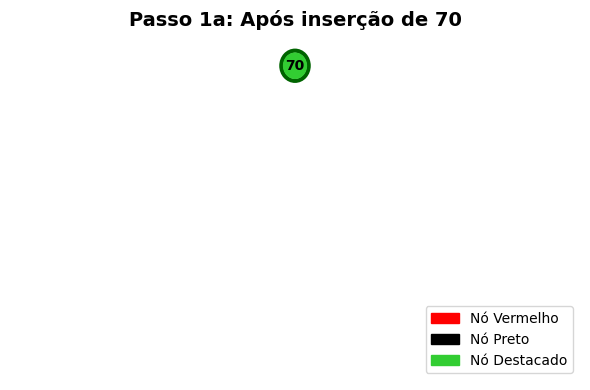


→ Balanceamento concluído


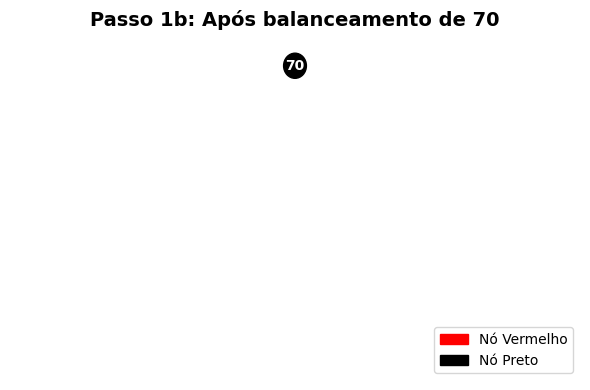


PASSO 2: Inserindo valor 34

→ Nó 34 inserido como VERMELHO


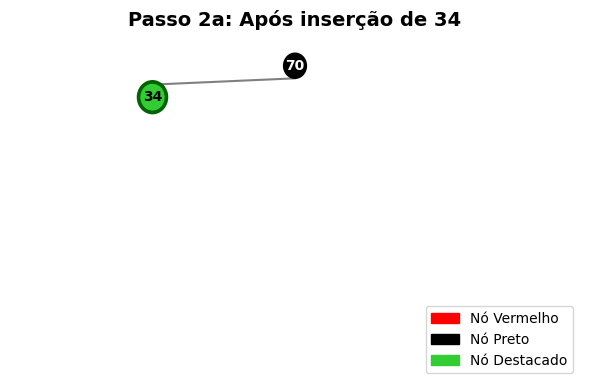


→ Balanceamento concluído


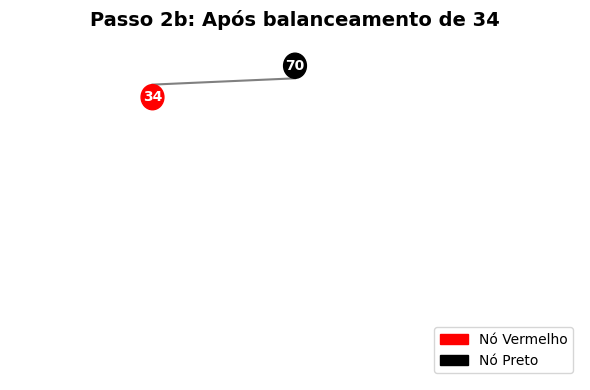


PASSO 3: Inserindo valor 40

→ Nó 40 inserido como VERMELHO


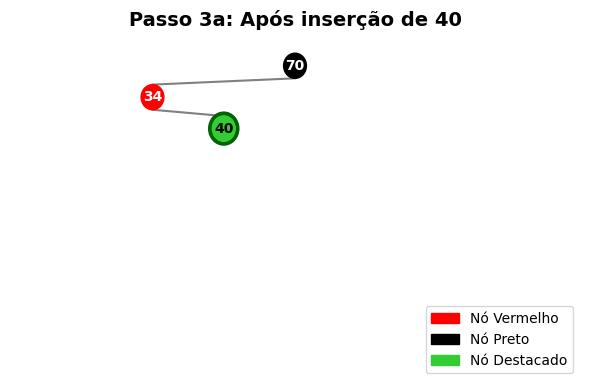

  ⚡ Caso 2: Nó é filho direito
  ↻ Rotação à ESQUERDA em 34
  ⚡ Caso 3: Recoloração e rotação
  ↺ Rotação à DIREITA em 70

→ Balanceamento concluído


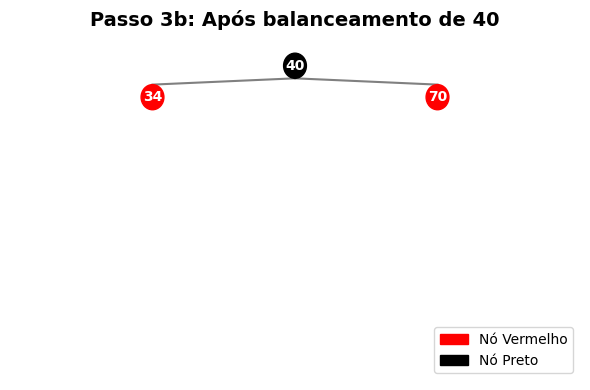


PASSO 4: Inserindo valor 41

→ Nó 41 inserido como VERMELHO


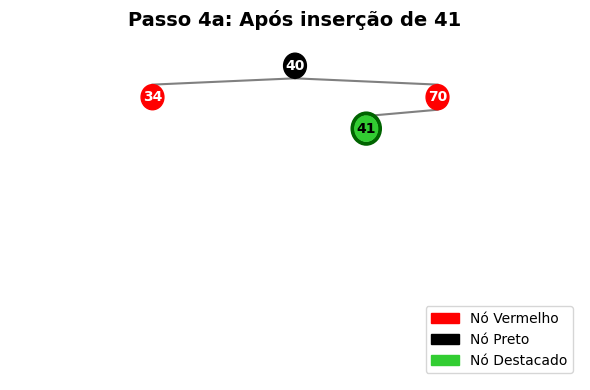

  ⚡ Caso 1: Recoloração (tio vermelho)

→ Balanceamento concluído


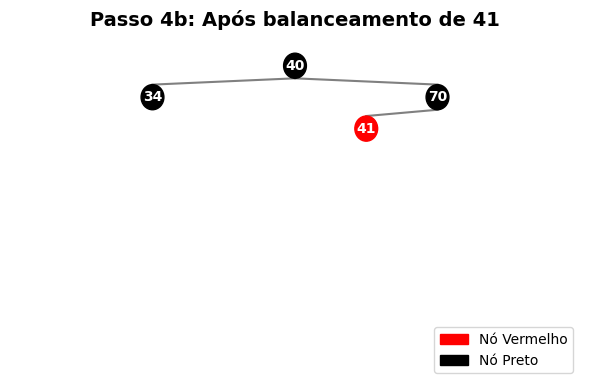


PASSO 5: Inserindo valor 93

→ Nó 93 inserido como VERMELHO


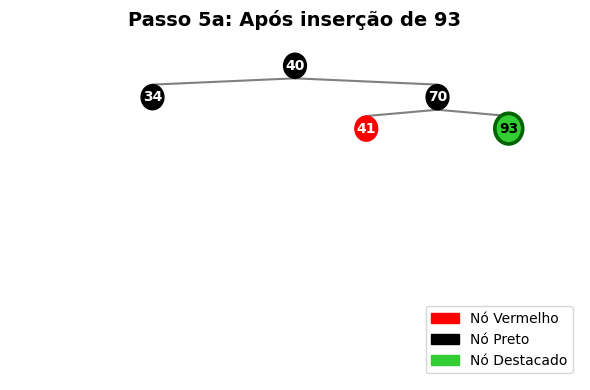


→ Balanceamento concluído


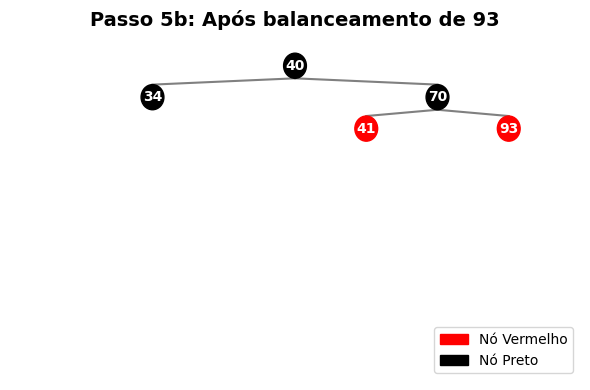


PASSO 6: Inserindo valor 66

→ Nó 66 inserido como VERMELHO


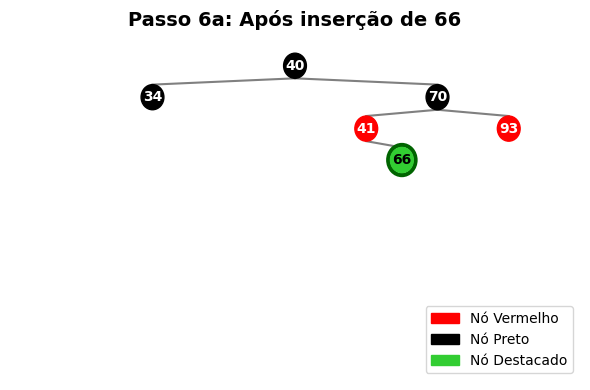

  ⚡ Caso 1: Recoloração (tio vermelho)

→ Balanceamento concluído


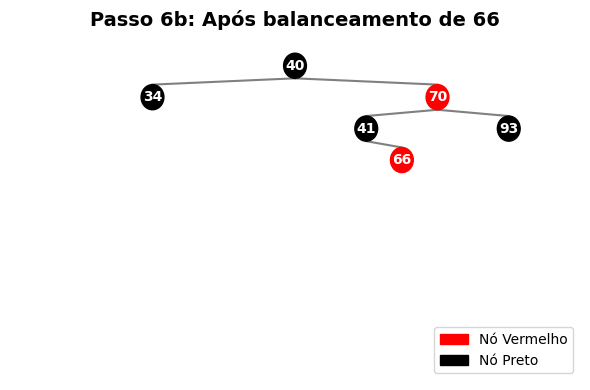


PASSO 7: Inserindo valor 87

→ Nó 87 inserido como VERMELHO


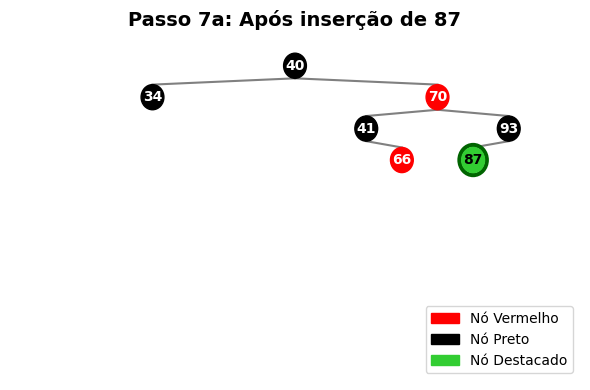


→ Balanceamento concluído


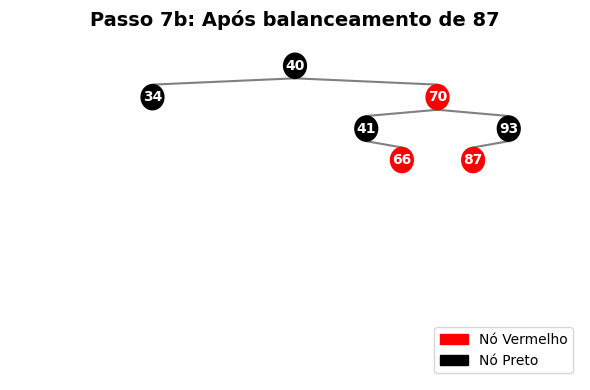


PASSO 8: Inserindo valor 53

→ Nó 53 inserido como VERMELHO


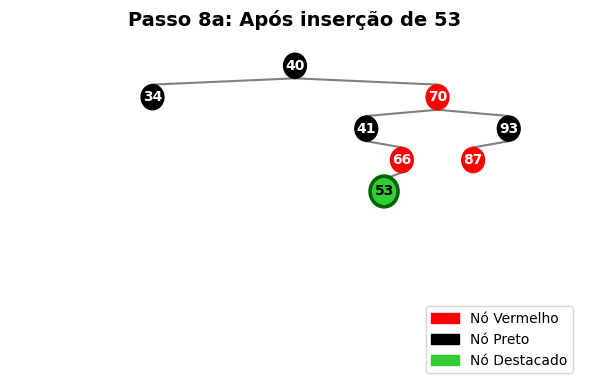

  ⚡ Caso 2: Nó é filho esquerdo
  ↺ Rotação à DIREITA em 66
  ⚡ Caso 3: Recoloração e rotação
  ↻ Rotação à ESQUERDA em 41

→ Balanceamento concluído


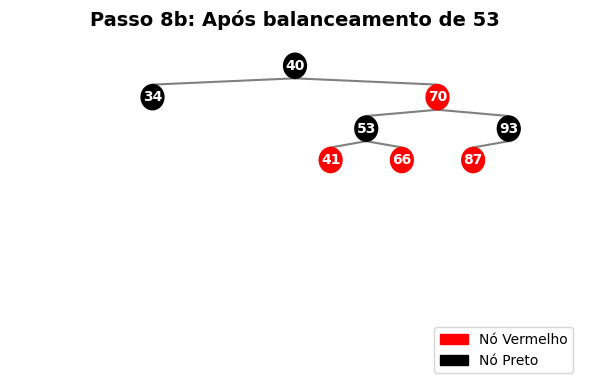


PASSO 9: Inserindo valor 80

→ Nó 80 inserido como VERMELHO


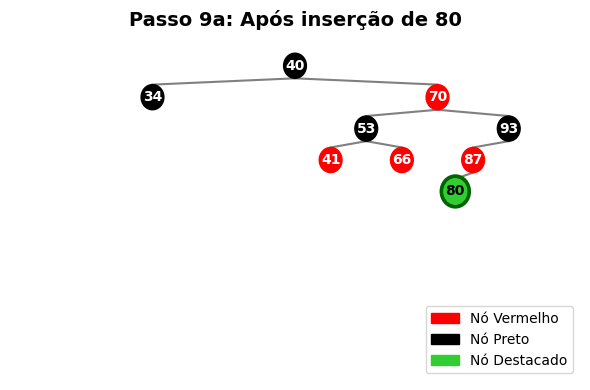

  ⚡ Caso 3: Recoloração e rotação
  ↺ Rotação à DIREITA em 93

→ Balanceamento concluído


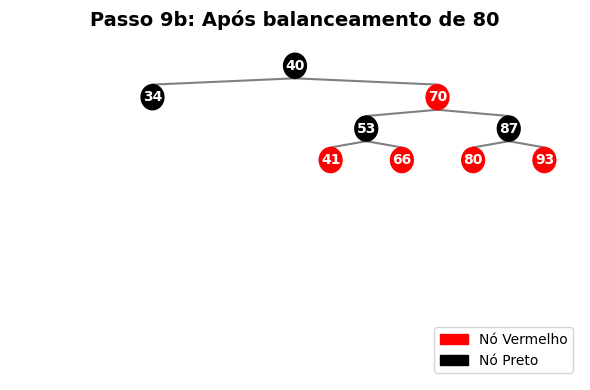


PASSO 10: Inserindo valor 44

→ Nó 44 inserido como VERMELHO


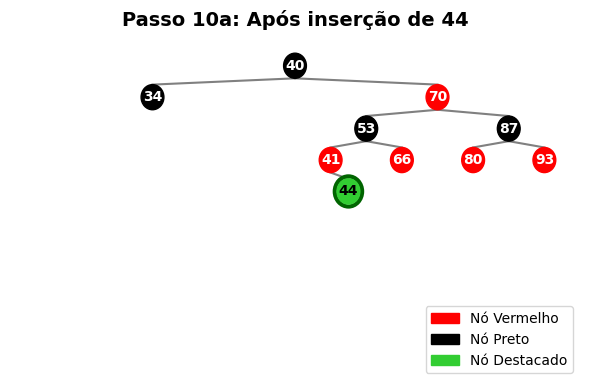

  ⚡ Caso 1: Recoloração (tio vermelho)
  ⚡ Caso 2: Nó é filho esquerdo
  ↺ Rotação à DIREITA em 70
  ⚡ Caso 3: Recoloração e rotação
  ↻ Rotação à ESQUERDA em 40

→ Balanceamento concluído


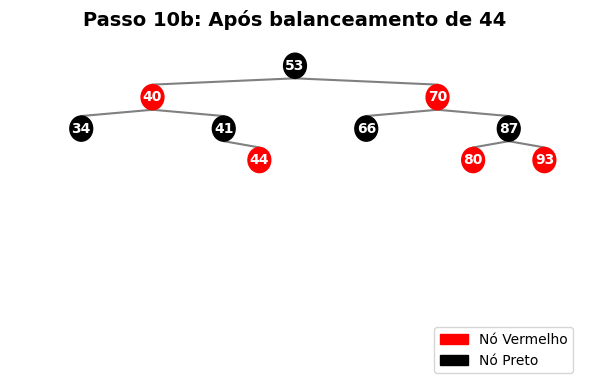


PASSO 11: Inserindo valor 3

→ Nó 3 inserido como VERMELHO


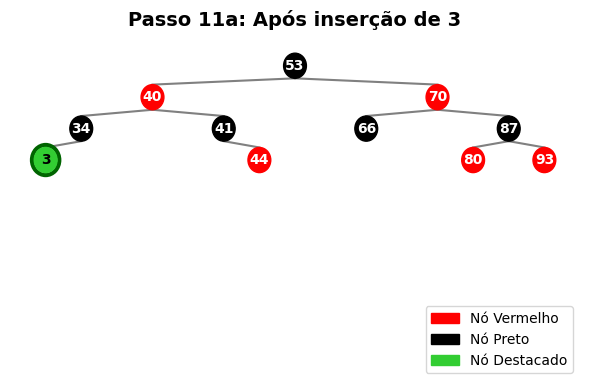


→ Balanceamento concluído


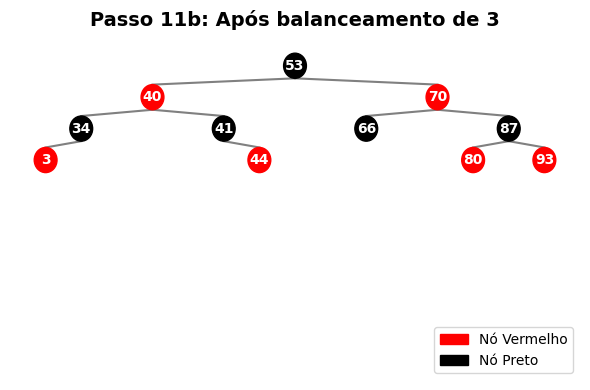


PASSO 12: Inserindo valor 97

→ Nó 97 inserido como VERMELHO


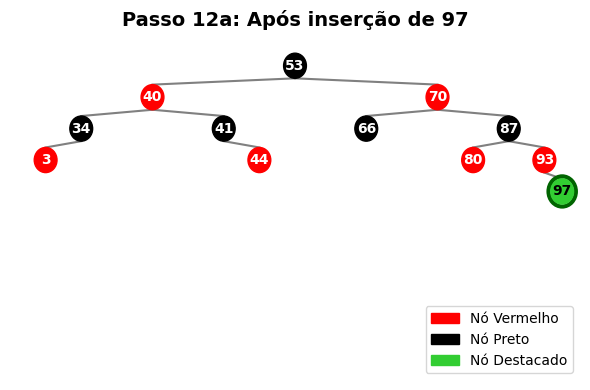

  ⚡ Caso 1: Recoloração (tio vermelho)
  ⚡ Caso 1: Recoloração (tio vermelho)

→ Balanceamento concluído


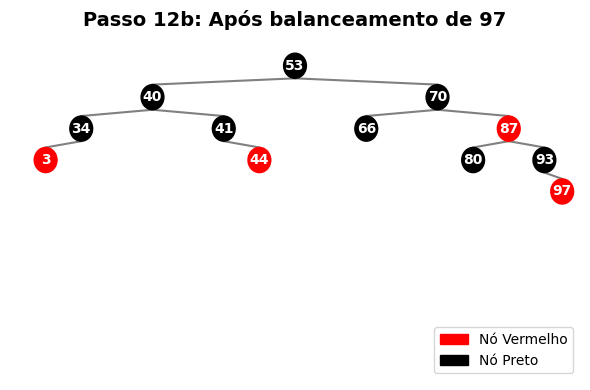


PASSO 13: Inserindo valor 62

→ Nó 62 inserido como VERMELHO


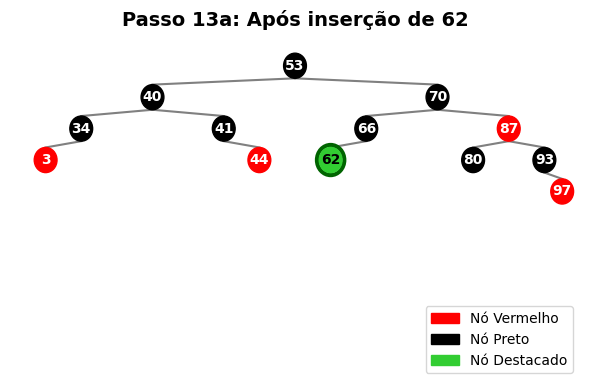


→ Balanceamento concluído


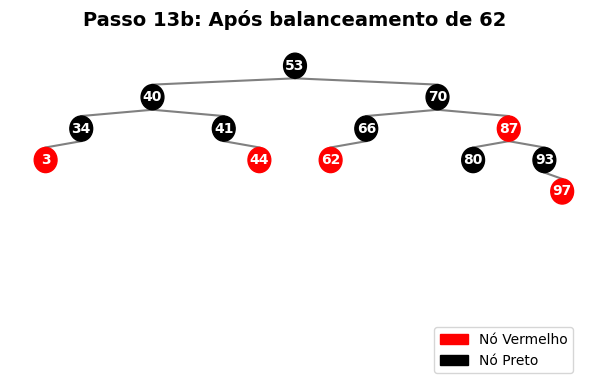


PASSO 14: Inserindo valor 22

→ Nó 22 inserido como VERMELHO


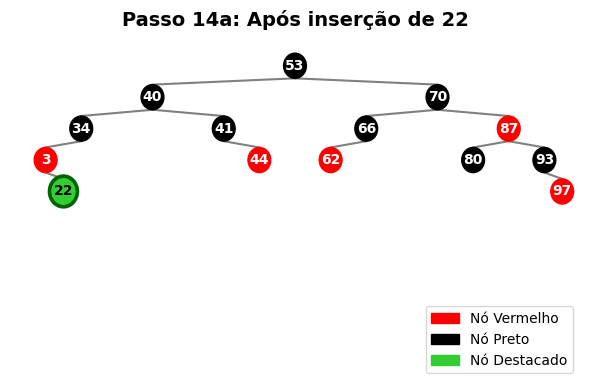

  ⚡ Caso 2: Nó é filho direito
  ↻ Rotação à ESQUERDA em 3
  ⚡ Caso 3: Recoloração e rotação
  ↺ Rotação à DIREITA em 34

→ Balanceamento concluído


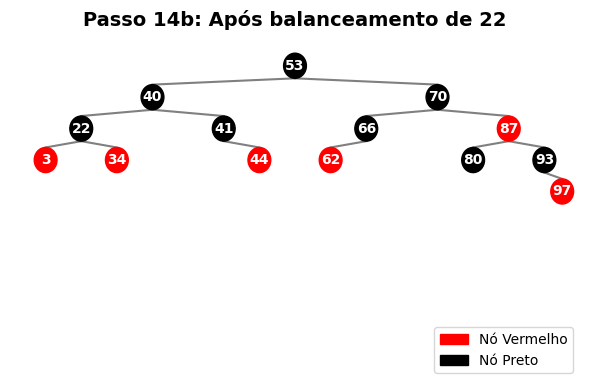


PASSO 15: Inserindo valor 14

→ Nó 14 inserido como VERMELHO


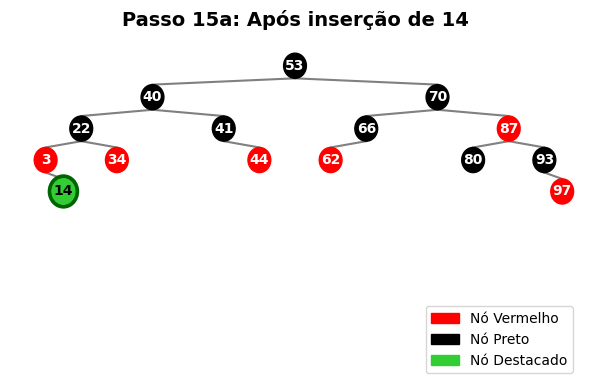

  ⚡ Caso 1: Recoloração (tio vermelho)

→ Balanceamento concluído


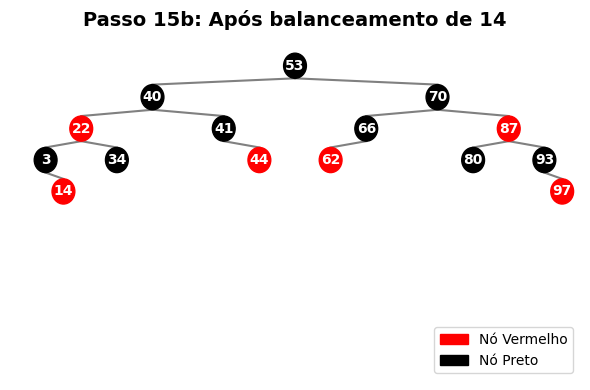


PASSO 16: Inserindo valor 54

→ Nó 54 inserido como VERMELHO


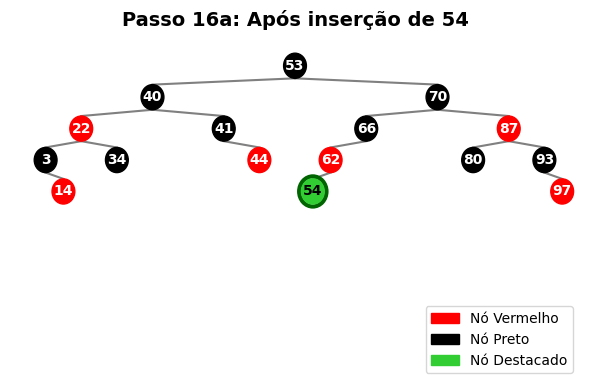

  ⚡ Caso 3: Recoloração e rotação
  ↺ Rotação à DIREITA em 66

→ Balanceamento concluído


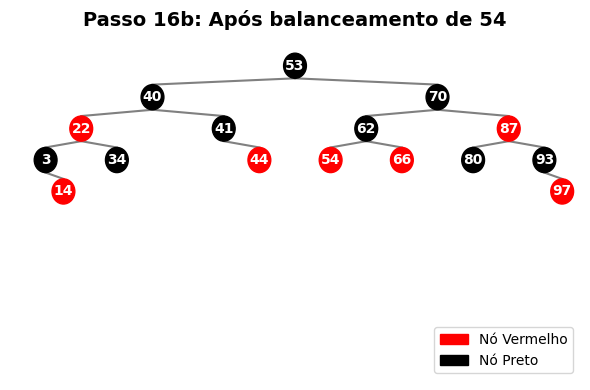


PASSO 17: Inserindo valor 78

→ Nó 78 inserido como VERMELHO


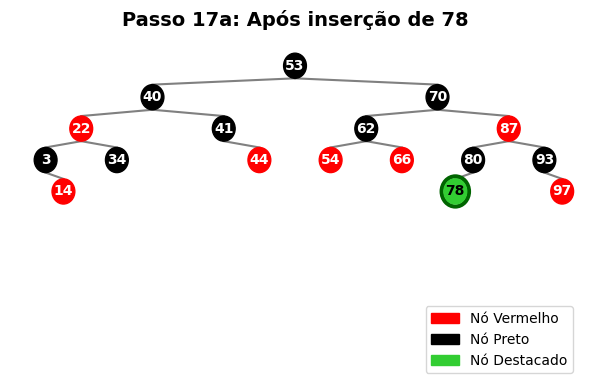


→ Balanceamento concluído


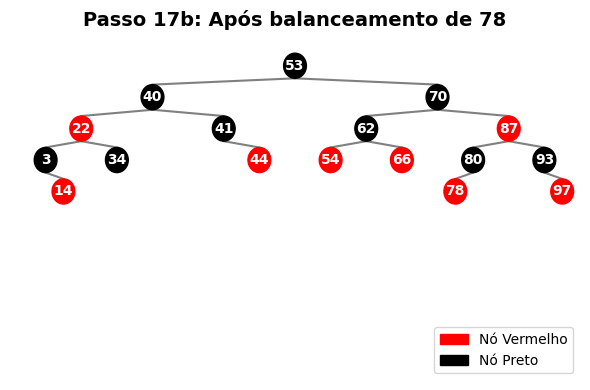


PASSO 18: Inserindo valor 37

→ Nó 37 inserido como VERMELHO


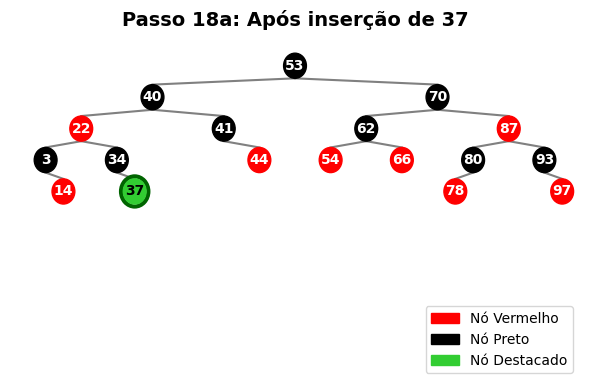


→ Balanceamento concluído


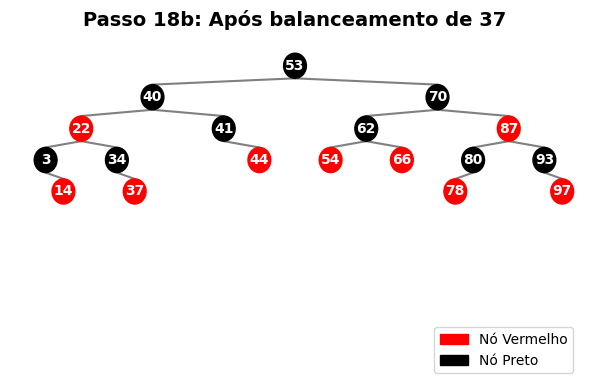


PASSO 19: Inserindo valor 73

→ Nó 73 inserido como VERMELHO


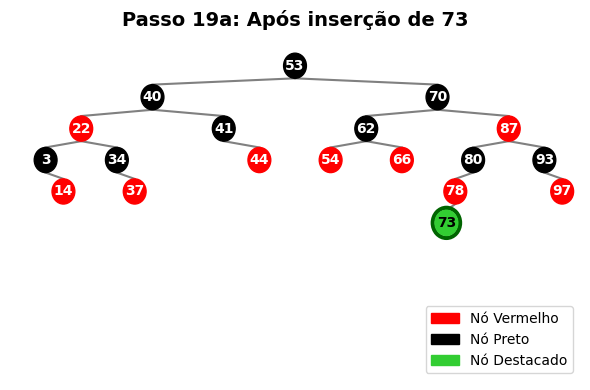

  ⚡ Caso 3: Recoloração e rotação
  ↺ Rotação à DIREITA em 80

→ Balanceamento concluído


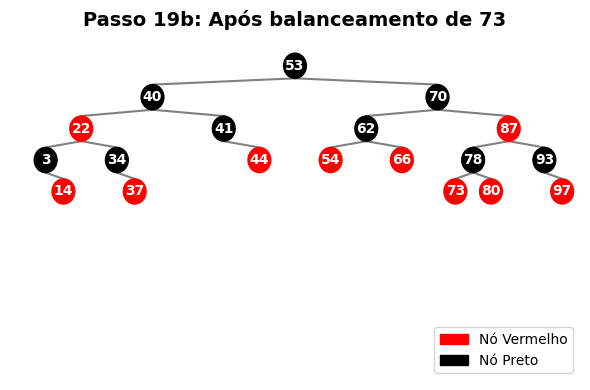


PASSO 20: Inserindo valor 11

→ Nó 11 inserido como VERMELHO


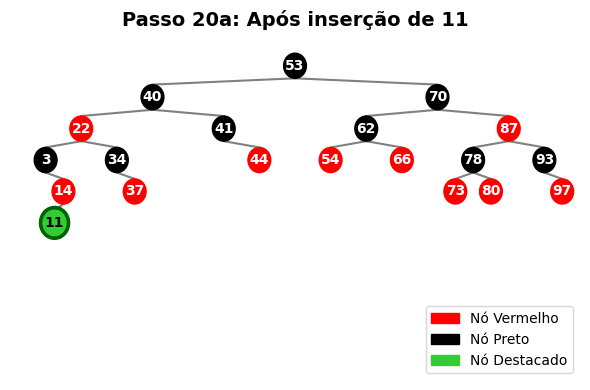

  ⚡ Caso 2: Nó é filho esquerdo
  ↺ Rotação à DIREITA em 14
  ⚡ Caso 3: Recoloração e rotação
  ↻ Rotação à ESQUERDA em 3

→ Balanceamento concluído


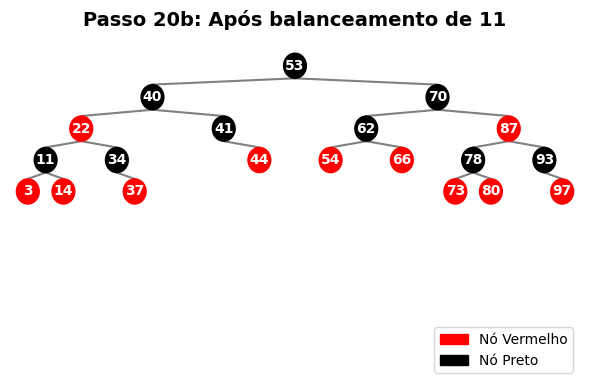


PASSO 21: Inserindo valor 26

→ Nó 26 inserido como VERMELHO


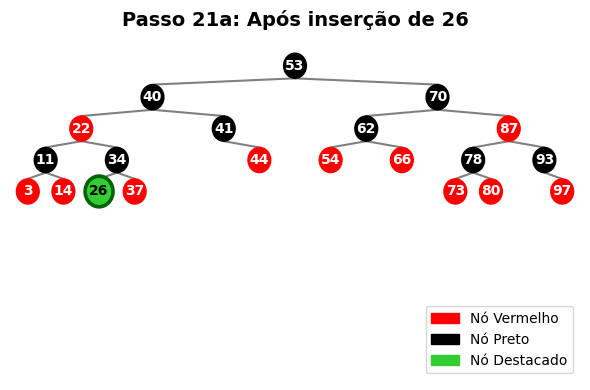


→ Balanceamento concluído


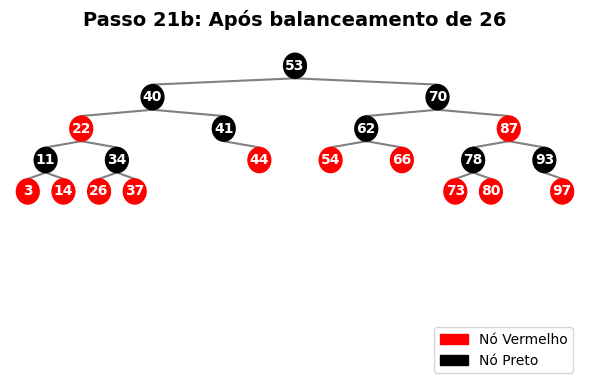


✅ ÁRVORE FINAL


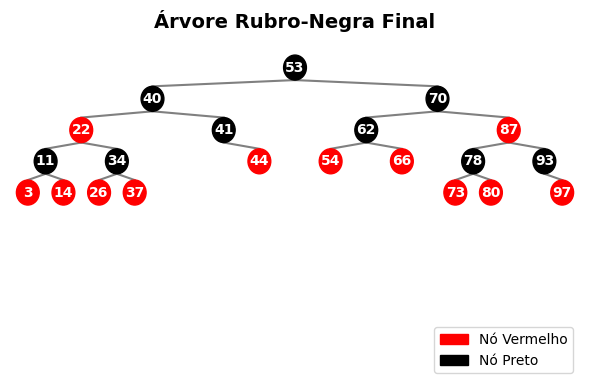

In [4]:
import random
arvore = ArvoreRubroNegra(visualizar_passos=True)
valores = random.sample(range(1, 101), 21)    
print("\n🌳 VALORES ALEATÓRIOS GERADOS:")
print(valores)
print("\n" + "="*60)
    
print("\n🌳 INSERINDO VALORES COM VISUALIZAÇÃO PASSO A PASSO\n")
    
for valor in valores:
    arvore.inserir(valor)
    
print("\n" + "="*60)
print("✅ ÁRVORE FINAL")
print("="*60)
arvore.plotar_arvore("Árvore Rubro-Negra Final")

## EXCLUSÃO ##

🎲 Valores aleatórios escolhidos para exclusão: [93, 78, 54]

PASSO 22: Excluindo valor 93


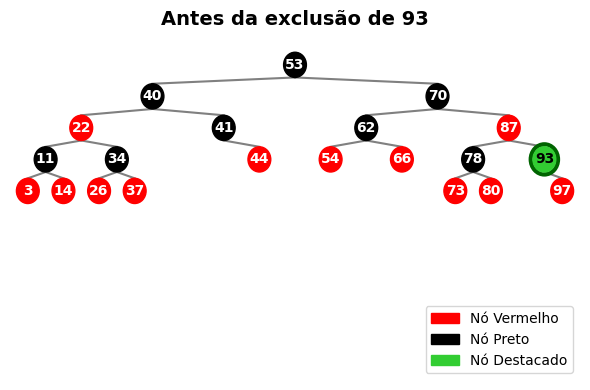

  → Caso: Nó sem filho esquerdo
  → Nó removido era PRETO, iniciando correção...

→ Exclusão concluída


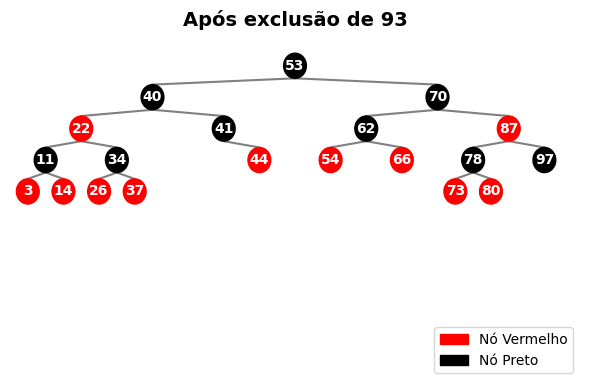


PASSO 23: Excluindo valor 78


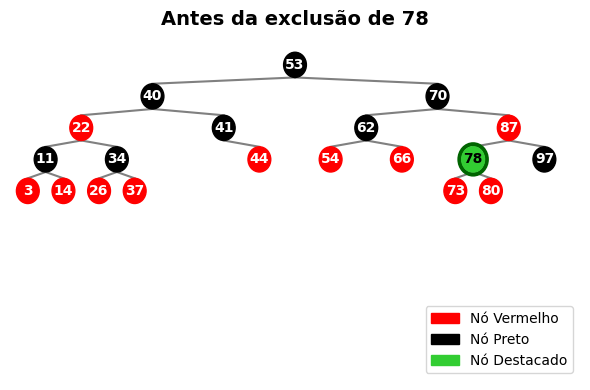

  → Caso: Nó com dois filhos
  → Sucessor encontrado: 80

→ Exclusão concluída


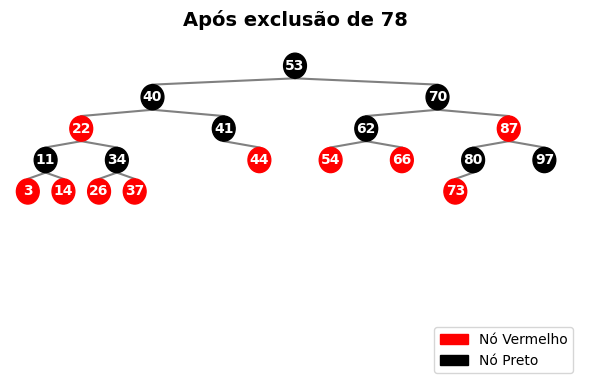


PASSO 24: Excluindo valor 54


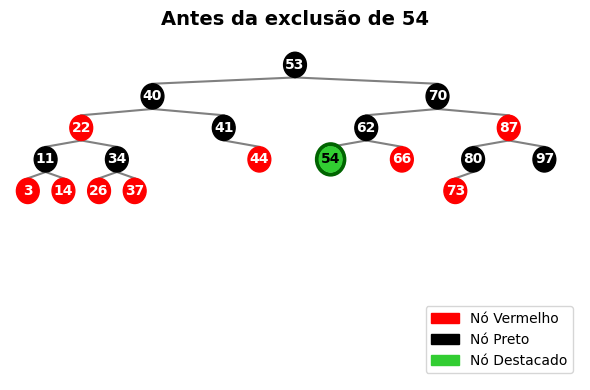

  → Caso: Nó sem filho esquerdo

→ Exclusão concluída


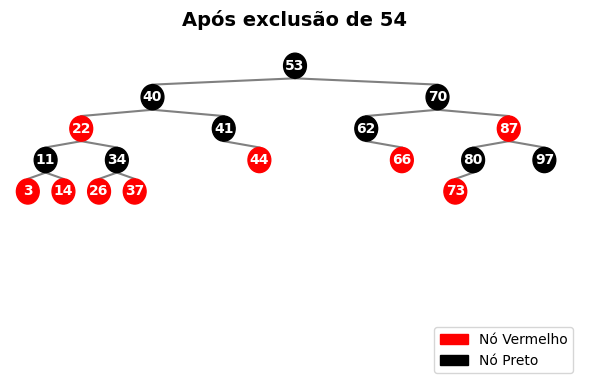


✅ Árvore final após exclusões:


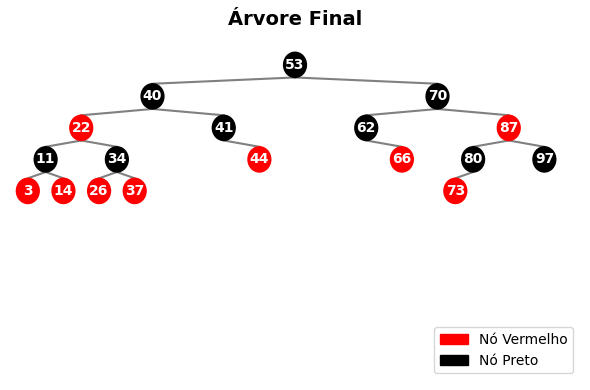

In [5]:
def coletar_valores(arvore):
    valores = []
    def percorrer(no):
        if no != arvore.NIL:
            valores.append(no.valor)
            percorrer(no.esquerda)
            percorrer(no.direita)
    percorrer(arvore.raiz)
    return valores

valores_na_arvore = coletar_valores(arvore)

excluir = random.sample(valores_na_arvore, 3)

print(f"🎲 Valores aleatórios escolhidos para exclusão: {excluir}")

for v in excluir:
    arvore.excluir(v)
    
print("\n✅ Árvore final após exclusões:")
arvore.plotar_arvore("Árvore Final")

## Buscar valor

🎲 Valores escolhidos: [53, 41, 40]

🔍 BUSCA: Procurando valor 53

  ✅ ENCONTRADO! Valor 53 está no nó.


C:\Users\PC\AppData\Local\Temp\ipykernel_7528\2705588479.py:94: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


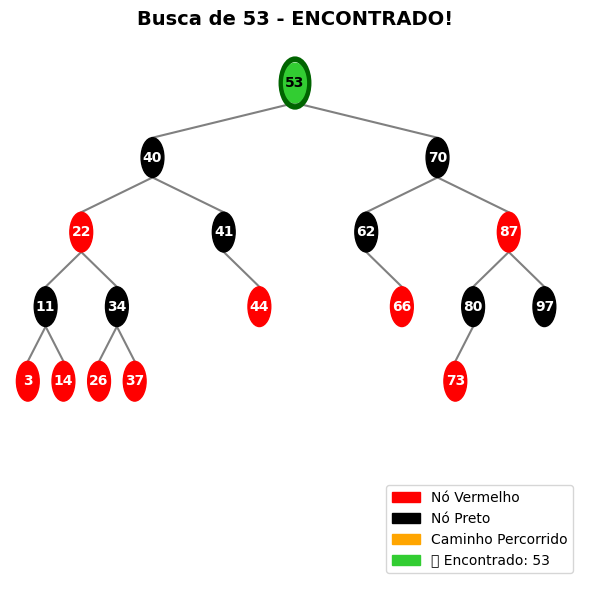


🔍 BUSCA: Procurando valor 41

  Passo 1: Visitando nó 53
  → 41 < 53, indo para ESQUERDA


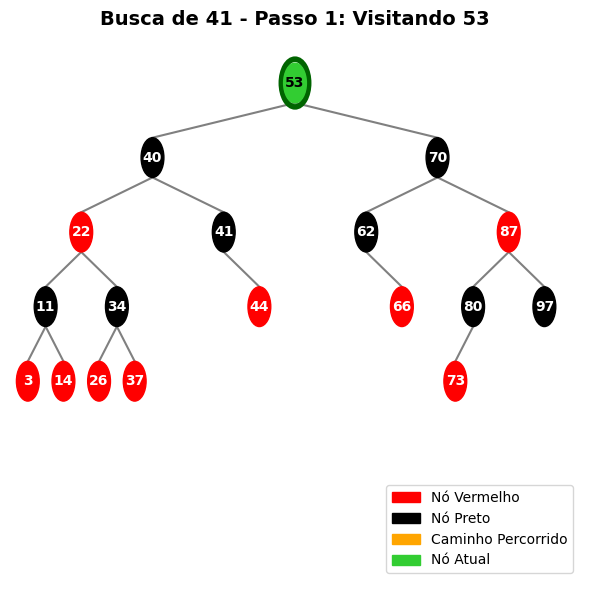


  Passo 2: Visitando nó 40
  → 41 > 40, indo para DIREITA


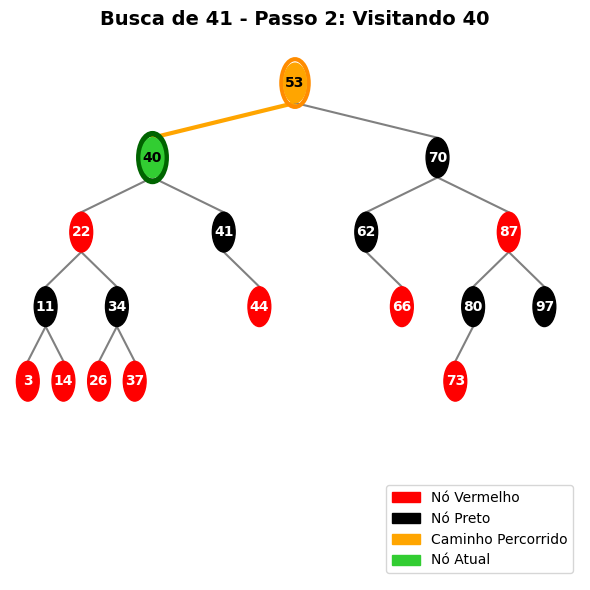


  ✅ ENCONTRADO! Valor 41 está no nó.


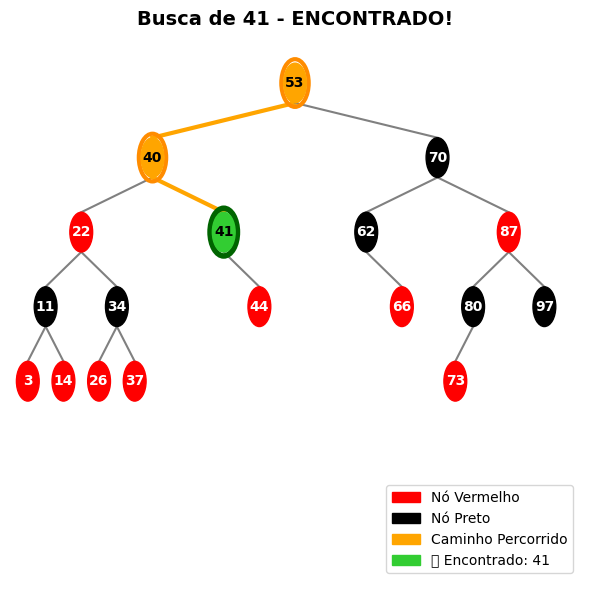


🔍 BUSCA: Procurando valor 40

  Passo 1: Visitando nó 53
  → 40 < 53, indo para ESQUERDA


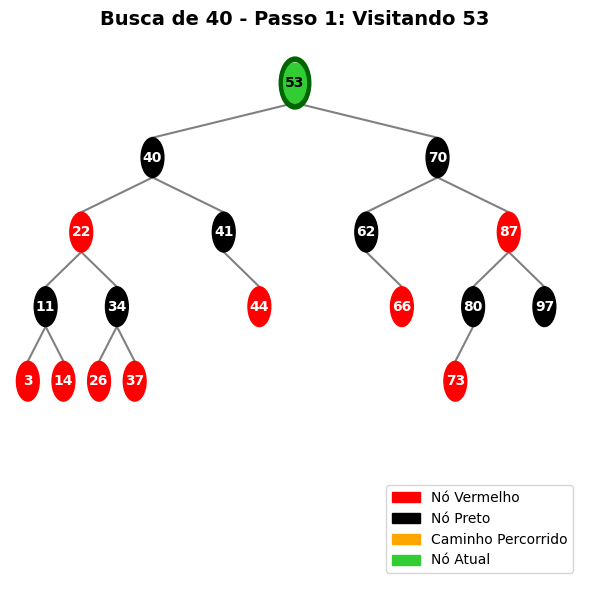


  ✅ ENCONTRADO! Valor 40 está no nó.


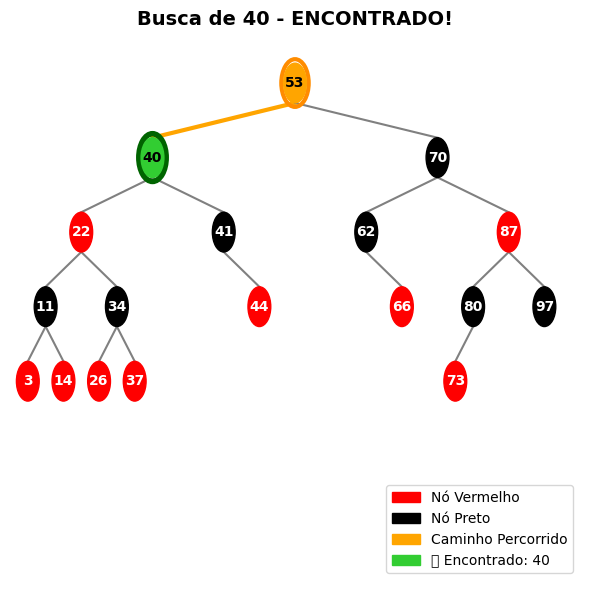

In [6]:
valores_na_arvore = coletar_valores(arvore)

valores_busca = random.sample(valores_na_arvore, 3)

print(f"🎲 Valores escolhidos: {valores_busca}")

for v in valores_busca:
    arvore.buscar(v)